In [1]:
from sklearn.datasets import load_files
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint


In [2]:
train_dir=r'C:\Users\Hp\Desktop\Reduced dataset\Train'
test_dir=r'C:\Users\Hp\Desktop\Reduced dataset\Test'


In [3]:
def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels

In [4]:
x_train, y_train,target_labels = load_dataset(train_dir)
x_test, y_test,_ = load_dataset(test_dir)
print('Loading complete!')

Loading complete!


In [5]:
print('Training set size : ' , x_train.shape[0])
print('Testing set size : ', x_test.shape[0])

Training set size :  9586
Testing set size :  3205


In [6]:
no_of_classes = len(np.unique(y_train))
no_of_classes

20

In [7]:
print(y_train[0:10])

[18 13  5  2  8 14 12 16  5  8]


In [8]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train,no_of_classes)
y_test = np_utils.to_categorical(y_test,no_of_classes)
y_train[0]

Using TensorFlow backend.


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0.], dtype=float32)

In [9]:
x_test,x_valid = x_test[1600:],x_test[:1600]
y_test,y_vaild = y_test[1600:],y_test[:1600]
print('Vaildation X : ',x_valid.shape)
print('Vaildation y :',y_vaild.shape)
print('Test X : ',x_test.shape)
print('Test y : ',y_test.shape)

Vaildation X :  (1600,)
Vaildation y : (1600, 20)
Test X :  (1605,)
Test y :  (1605, 20)


In [10]:
x_train[0]

'C:\\Users\\Hp\\Desktop\\Reduced dataset\\Train\\Tomato 1\\r2_0_100.jpg'

In [11]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img

def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

In [12]:
x_train = np.array(convert_image_to_array(x_train))
print('Training set shape : ',x_train.shape)

x_valid = np.array(convert_image_to_array(x_valid))
print('Validation set shape : ',x_valid.shape)

x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ',x_test.shape)

print('1st training image shape ',x_train[0].shape)

Training set shape :  (9586, 100, 100, 3)
Validation set shape :  (1600, 100, 100, 3)
Test set shape :  (1605, 100, 100, 3)
1st training image shape  (100, 100, 3)


In [13]:
print('1st training image as array',x_train[0])

1st training image as array [[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]


In [14]:
x_train = x_train.astype('float32')/255

In [15]:
x_valid = x_valid.astype('float32')/255

In [16]:
x_test = x_test.astype('float32')/255

In [17]:
x_train[0]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

In [18]:
import matplotlib.pyplot as plt

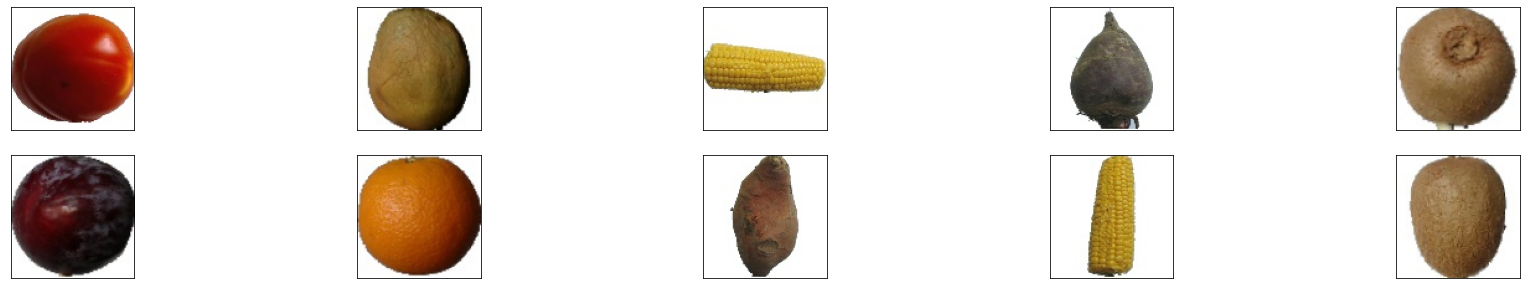

In [19]:
fig = plt.figure(figsize =(30,5))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

In [20]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
#from keras import backend as K

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = 2,input_shape=(100,100,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 32,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 64,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 128,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(150))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(20,activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 16)      208       
_________________________________________________________________
activation_1 (Activation)    (None, 100, 100, 16)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 64)        8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)       

In [21]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
print('Compiled!')

Compiled!


In [22]:
batch_size = 32

history = model.fit(x_train,y_train,
        batch_size = 32,
        epochs=30,
        validation_data=(x_valid, y_vaild),
        verbose=2, shuffle=True)

Train on 9586 samples, validate on 1600 samples
Epoch 1/30
 - 55s - loss: 0.7172 - accuracy: 0.7699 - val_loss: 0.2274 - val_accuracy: 0.9544
Epoch 2/30
 - 53s - loss: 0.0973 - accuracy: 0.9700 - val_loss: 0.2905 - val_accuracy: 0.9663
Epoch 3/30
 - 52s - loss: 0.0439 - accuracy: 0.9869 - val_loss: 0.3999 - val_accuracy: 0.9506
Epoch 4/30
 - 53s - loss: 0.0365 - accuracy: 0.9892 - val_loss: 0.5386 - val_accuracy: 0.9456
Epoch 5/30
 - 53s - loss: 0.0220 - accuracy: 0.9925 - val_loss: 0.3253 - val_accuracy: 0.9725
Epoch 6/30
 - 52s - loss: 0.0216 - accuracy: 0.9939 - val_loss: 0.5510 - val_accuracy: 0.9463
Epoch 7/30
 - 53s - loss: 0.0180 - accuracy: 0.9952 - val_loss: 0.4273 - val_accuracy: 0.9800
Epoch 8/30
 - 53s - loss: 0.0148 - accuracy: 0.9958 - val_loss: 0.6394 - val_accuracy: 0.9475
Epoch 9/30
 - 53s - loss: 0.0184 - accuracy: 0.9949 - val_loss: 0.6361 - val_accuracy: 0.9781
Epoch 10/30
 - 53s - loss: 0.0080 - accuracy: 0.9978 - val_loss: 0.4585 - val_accuracy: 0.9800
Epoch 11/30

In [23]:
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])
#"Accuracy in percentage= {}%".format(score[1]*100)


 Test accuracy: 0.9700934290885925


'Accuracy in percentage= 97.00934290885925%'

In [24]:
y_pred = model.predict(x_test)


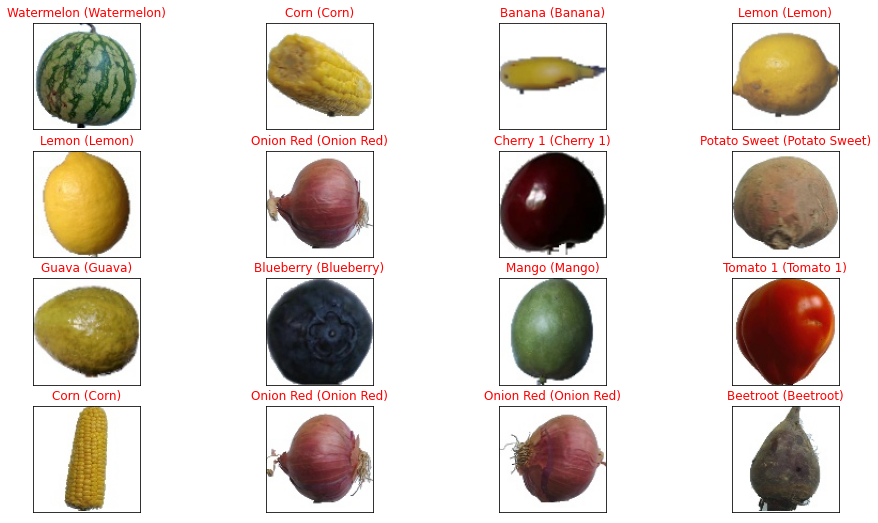

In [25]:
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("red" if pred_idx == true_idx else "red"))

In [26]:
import matplotlib.pyplot as plt 
plt.figure(1)  


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

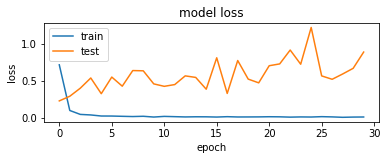

In [27]:
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()